In [1]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import *
from keras.layers import Input

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 1)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

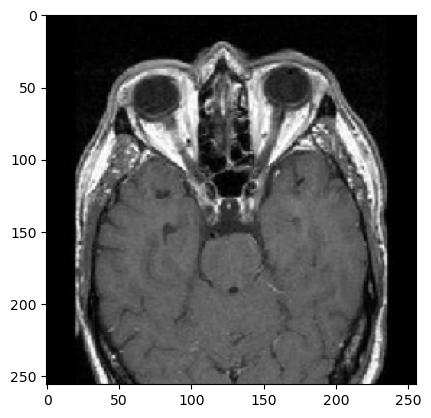

In [5]:
plt.imshow(X[0], cmap='gray')

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [7]:
xtrain.shape, xtest.shape

((977, 256, 256, 3), (245, 256, 256, 3))

In [8]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization,MaxPool2D
import numpy as np
tf.keras.backend.clear_session()

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape= (256, 256, 3),weights='imagenet',include_top=False)
for layer in base_model.layers:
    layer.trainable = False
# Set the last resnet block to trainable
# base_model.layers[-2].trainable = True 
# base_model.layers[-3].trainable = True
# base_model.layers[-4].trainable = True

# model = Sequential()
# model.add(Input(shape=(256,256,3)))
# model.add(base_model)
# model.add(Flatten())
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='softmax'))

ValueError: `input_shape` must be a tuple of three integers.

In [60]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [46]:
xx=xtrain
yy=ytrain

In [16]:
# model.fit(xtrain, ytrain, epochs=10, batch_size=32)

In [39]:
# let's extract features from convolutional network for XBG
feature_extractor = base_model.predict(xtrain)

31/31 [==============================] - 89s 3s/step


In [47]:
# actually our data in the form of (1000, 8, 8, 512) into (1000, 8*8*512) 
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

In [48]:
# perform same operation on test dataset
feature_extractor_test = base_model.predict(xtest)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

8/8 [==============================] - 19s 2s/step


In [49]:
# defining XGBoost Classifier model
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_features, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [50]:
prediction = model.predict(X_test_features)

In [51]:
# pred = model.predict(xtest)
pred = prediction

In [ ]:
# misclassified=np.where(ytest!=pred)
# misclassified

In [ ]:
# print("Total Misclassified Samples: ",len(misclassified[0]))
# print(pred[36],ytest[36])

In [52]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [53]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = model.predict(img1)
#     print(p)
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = model.predict(img1)
#     print(p)
#     print(p[0][0])
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [58]:
# pred_y = np.argmax(pred, axis=1)
pred_y = pred

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_score, f1_score, recall_score,accuracy_score
print("ResNet50 Model Metrics")
print('Accuracy: ', accuracy_score(ytest, pred_y))
print('Precision: ', precision_score(ytest, pred_y))
print('F1 Score: ', f1_score(ytest, pred_y))
print('Recall Score: ', recall_score(ytest, pred_y))
print('Roc Auc Score: ', roc_auc_score(ytest, pred_y))

ResNet50 Model Metrics
Accuracy:  0.9918367346938776
Precision:  1.0
F1 Score:  0.9938650306748467
Recall Score:  0.9878048780487805
Roc Auc Score:  0.9939024390243902
